In [266]:
import requests
from datetime import datetime
import time

import json
import pandas as pd
import numpy as np

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
import matplotlib.pyplot as plt

In [268]:
risk_dataset = pd.read_csv("dataset.csv")

In [269]:
risk_dataset.describe().T 

,count,mean,std,min,25%,50%,75%,max
illicit,19787.0,9.723556e-02,2.962857e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
timestamp,19787.0,1.685030e+12,1.920264e+08,1.684850e+12,1.684899e+12,1.684910e+12,1.685340e+12,1.685363e+12
amount,19787.0,1.260873e+09,1.816396e+10,0.000000e+00,1.000000e+00,5.000000e+00,3.000000e+07,1.999999e+12
fee,19787.0,2.304543e+04,1.510587e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+06
net_usage,19787.0,2.211121e+02,1.228175e+02,0.000000e+00,2.570000e+02,2.650000e+02,2.680000e+02,1.020000e+03
multi_sign_fee,19787.0,2.021529e+02,1.421697e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+06
net_fee,19787.0,7.135048e+04,1.388092e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.793000e+06
energy_penalty_total,19787.0,7.262125e+03,1.256151e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.724500e+04,4.392600e+05
energy_usage,19787.0,7.994690e+03,1.950085e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.517640e+05
energy_fee,19787.0,2.478292e+06,8.181961e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.469049e+08


In [270]:

#StandardScaler

from sklearn.preprocessing import StandardScaler
numerical_col=['amount','fee','net_usage','multi_sign_fee','net_fee','energy_penalty_total','energy_usage','energy_fee','energy_usage_total','memoFee','origin_energy_usage','o_balance','o_transactions_in','o_transactions_out','o_totalTransactionCount','o_energyCost','o_netCost','o_freeNetUsed','o_age','t_balance','t_transactions_in','t_transactions_out','t_totalTransactionCount','t_energyCost','t_netCost','t_freeNetUsed','t_age']

scaler=StandardScaler()
scaled_numpy = scaler.fit_transform(risk_dataset[numerical_col])
scaled_df = pd.DataFrame(scaled_numpy, columns = numerical_col)

df_drop= risk_dataset.drop(columns = numerical_col)


risk_dataset=scaled_df.join(df_drop)  # StandardScaler

In [271]:
risk_dataset.describe().T 

,count,mean,std,min,25%,50%,75%,max
amount,19787.0,1.553370e-16,1.000025e+00,-6.941793e-02,-6.941793e-02,-6.941793e-02,-6.776627e-02,1.100415e+02
fee,19787.0,2.704182e-15,1.000025e+00,-1.525633e-01,-1.525633e-01,-1.525633e-01,-1.525633e-01,1.308766e+01
net_usage,19787.0,-8.549531e-15,1.000025e+00,-1.800377e+00,2.922122e-01,3.573511e-01,3.817782e-01,6.504840e+00
multi_sign_fee,19787.0,-1.509780e-16,1.000025e+00,-1.421949e-02,-1.421949e-02,-1.421949e-02,-1.421949e-02,7.032603e+01
net_fee,19787.0,2.232408e-15,1.000025e+00,-5.140313e-01,-5.140313e-01,-5.140313e-01,-5.140313e-01,1.240330e+01
energy_penalty_total,19787.0,-3.125749e-15,1.000025e+00,-5.781399e-01,-5.781399e-01,-5.781399e-01,7.947397e-01,3.439148e+01
energy_usage,19787.0,-9.998965e-16,1.000025e+00,-4.099766e-01,-4.099766e-01,-4.099766e-01,-4.099766e-01,4.839754e+01
energy_fee,19787.0,3.924400e-15,1.000025e+00,-3.029047e-01,-3.029047e-01,-3.029047e-01,-3.029047e-01,4.209691e+01
energy_usage_total,19787.0,1.124329e-15,1.000025e+00,-5.367872e-01,-5.367872e-01,-5.367872e-01,6.928883e-01,3.615739e+01
memoFee,19787.0,-1.630498e-16,1.000025e+00,-3.961242e-02,-3.961242e-02,-3.961242e-02,-3.961242e-02,2.524461e+01


In [272]:
df_risk_table_fix= risk_dataset.drop(columns=['hash', 'timestamp','ownerAddress','toAddress'])
df_risk_table_fix

,amount,fee,net_usage,multi_sign_fee,net_fee,energy_penalty_total,energy_usage,energy_fee,energy_usage_total,memoFee,...,SR20,SR21,SR22,SR23,SR24,SR25,SR26,SR27,contractType_1,contractType_31
0,-0.068680,-0.152563,-1.800377,-0.014219,1.416725,-0.57814,-0.409977,-0.302905,-0.536787,-0.039612,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1,0
1,-0.069418,-0.152563,0.357351,-0.014219,-0.514031,-0.57814,-0.409977,-0.302905,-0.536787,-0.039612,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,0
2,-0.036385,-0.152563,0.951744,-0.014219,-0.514031,0.79474,1.225634,-0.302905,0.692888,-0.039612,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0,1
3,-0.069418,-0.152563,0.357351,-0.014219,-0.514031,-0.57814,-0.409977,-0.302905,-0.536787,-0.039612,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,0
4,-0.063912,-0.152563,0.381778,-0.014219,-0.514031,-0.57814,-0.409977,-0.302905,-0.536787,-0.039612,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19782,-0.068653,-0.152563,0.381778,-0.014219,-0.514031,-0.57814,-0.409977,-0.302905,-0.536787,-0.039612,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1,0
19783,-0.069418,-0.152563,0.357351,-0.014219,-0.514031,-0.57814,-0.409977,-0.302905,-0.536787,-0.039612,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1,0
19784,-0.069418,-0.152563,0.357351,-0.014219,-0.514031,-0.57814,-0.409977,-0.302905,-0.536787,-0.039612,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1,0
19785,-0.069418,-0.152563,0.357351,-0.014219,-0.514031,-0.57814,-0.409977,-0.302905,-0.536787,-0.039612,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0


In [273]:
df_risk_table_fix_x=df_risk_table_fix.drop(columns=['illicit'])
df_risk_table_fix_y=df_risk_table_fix[['illicit']]

In [274]:
df_risk_table_fix_x

,amount,fee,net_usage,multi_sign_fee,net_fee,energy_penalty_total,energy_usage,energy_fee,energy_usage_total,memoFee,...,SR20,SR21,SR22,SR23,SR24,SR25,SR26,SR27,contractType_1,contractType_31
0,-0.068680,-0.152563,-1.800377,-0.014219,1.416725,-0.57814,-0.409977,-0.302905,-0.536787,-0.039612,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1,0
1,-0.069418,-0.152563,0.357351,-0.014219,-0.514031,-0.57814,-0.409977,-0.302905,-0.536787,-0.039612,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1,0
2,-0.036385,-0.152563,0.951744,-0.014219,-0.514031,0.79474,1.225634,-0.302905,0.692888,-0.039612,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0,1
3,-0.069418,-0.152563,0.357351,-0.014219,-0.514031,-0.57814,-0.409977,-0.302905,-0.536787,-0.039612,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,0
4,-0.063912,-0.152563,0.381778,-0.014219,-0.514031,-0.57814,-0.409977,-0.302905,-0.536787,-0.039612,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19782,-0.068653,-0.152563,0.381778,-0.014219,-0.514031,-0.57814,-0.409977,-0.302905,-0.536787,-0.039612,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1,0
19783,-0.069418,-0.152563,0.357351,-0.014219,-0.514031,-0.57814,-0.409977,-0.302905,-0.536787,-0.039612,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1,0
19784,-0.069418,-0.152563,0.357351,-0.014219,-0.514031,-0.57814,-0.409977,-0.302905,-0.536787,-0.039612,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1,0
19785,-0.069418,-0.152563,0.357351,-0.014219,-0.514031,-0.57814,-0.409977,-0.302905,-0.536787,-0.039612,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0


In [275]:
df_risk_table_fix_y

,illicit
0,0
1,0
2,0
3,0
4,0
...,...
19782,0
19783,0
19784,0
19785,0


In [276]:
df_risk_table_fix_y.value_counts()

illicit
0          17863
1           1924
dtype: int64

<AxesSubplot:>

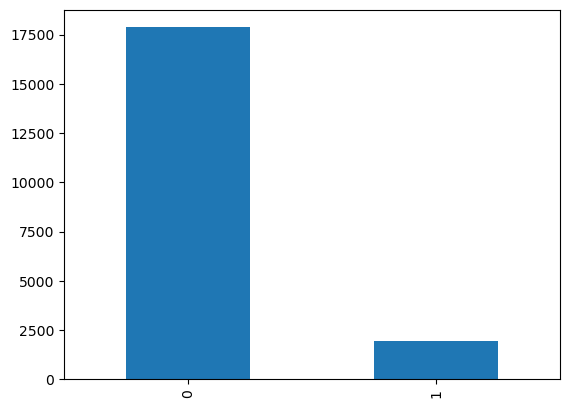

In [277]:
df_risk_table_fix_y['illicit'].value_counts().sort_index().plot.bar()

In [278]:
# re-sample by SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

print("After over-sampling")

oversample = SMOTE()
x_resample, y_resample = oversample.fit_resample(df_risk_table_fix_x, df_risk_table_fix_y)   # over-sampling
# summarize the new class distribution

x_resample, y_resample = df_risk_table_fix_x, df_risk_table_fix_y # no over-sample


print(y_resample.value_counts() )
print(len(x_resample))

After over-sampling
illicit
0          17863
1           1924
dtype: int64
19787


# OOB



iteration : 0
(tn, fp, fn, tp) :  [5334   12  545   46]
Accuracy: 0.9061815731851103
Precision: 0.7931034482758621
F1 Score: 0.14175654853620956
oob score :  0.9101805054151625
CV_score :  [0.91155235 0.90722022 0.90902527 0.91046931 0.9101083 ]
CV_score average:  0.9096750902527078
AUC : 0.6948870797338554


iteration : 1
(tn, fp, fn, tp) :  [5365   11  508   53]
Accuracy: 0.9125821121778676
Precision: 0.828125
F1 Score: 0.1696
oob score :  0.9072924187725632
CV_score :  [0.90685921 0.90397112 0.90830325 0.90541516 0.90469314]
CV_score average:  0.9058483754512636
AUC : 0.7233318279963502


iteration : 2
(tn, fp, fn, tp) :  [5325    6  561   45]
Accuracy: 0.9044972208185953
Precision: 0.8823529411764706
F1 Score: 0.136986301369863
oob score :  0.9110469314079422
CV_score :  [0.9101083  0.91227437 0.91444043 0.91046931 0.9101083 ]
CV_score average:  0.9114801444043323
AUC : 0.7024080151402872


iteration : 3
(tn, fp, fn, tp) :  [5350    6  532   49]
Accuracy: 0.9093818426814889
Preci

Text(0, 0.5, 'Acc_list')

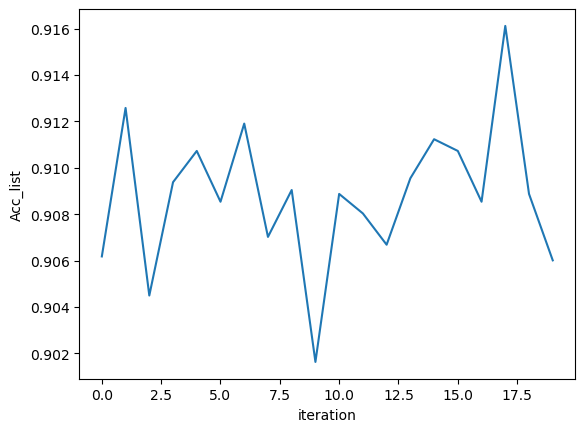

In [279]:
## OOB score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


acc_total=0
prec_total=0
f1_total=0
oob_total=0
auc_total=0
cvs_total=0
acc_best=0
oob_best=0
prec_best=0
f1_best=0
obb_best=0
auc_best=0
cvs_best=0
Acc_list = {}

set_depth=27
set_estimators=100
iteration=20




for k in range( iteration):
   
    # Splitting the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(x_resample, y_resample, train_size=0.7)
    
    classifier_rf = RandomForestClassifier( n_jobs=-1, max_depth=set_depth,
                                       n_estimators=set_estimators, oob_score=True)
    classifier_rf.fit(X_train, y_train.values.ravel())
    
    CV_score=cross_val_score(classifier_rf,X_train, y_train.values.ravel(),cv=5,scoring="accuracy")   
    cvs=np.average(CV_score)
    
    
    y_pred = classifier_rf.predict(X_test)
    print("\n")
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print("iteration :",k)
    print("(tn, fp, fn, tp) : " ,cnf_matrix.ravel())
    acc=metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:",acc)
    prec=metrics.precision_score(y_test, y_pred)
    print("Precision:",prec)
    f1=metrics.f1_score(y_test, y_pred)
    print("F1 Score:",f1)
    oob=classifier_rf.oob_score_
    print("oob score : ",oob)
    print("CV_score : ", CV_score)
    print("CV_score average: ", cvs)    
    
    
    
        #define metrics
    y_pred_proba = classifier_rf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    print("AUC :",auc)
    
    Acc_list[k] = acc
    
    acc_total=acc_total+acc
    prec_total=prec_total+prec
    f1_total=f1_total+f1
    oob_total=oob_total+oob
    auc_total=auc_total+auc
    cvs_total=cvs_total+cvs
    
    if cvs>cvs_best :
        cvs_best=cvs    
    if acc>acc_best :
        acc_best=acc
    if prec>prec_best :
        prec_best=prec
    if f1>f1_best :
        f1_best=f1
    if oob>oob_best :
        oob_best=oob
    if auc>auc_best :
        auc_best=auc

print("\n")
print("total iteration :", iteration)  
print("max depth :", set_depth)  
print("n estimators :", set_estimators)  

print("\n")
print("Accuracy average :",acc_total/iteration)
print("Precision average :",prec_total/iteration)
print("F1 average :",f1_total/iteration)
print("OOB average :",oob_total/iteration)
print("AUC average :",auc_total/iteration)
print("CV score average :",cvs_total/iteration)
print("\n")
print("Accuracy best :",acc_best)
print("Precision best :",prec_best)
print("F1 best :",f1_best)
print("OOB best :",oob_best)
print("CV score best :",auc_best)
print("AUC best :",cvs_best)

plt.figure()
plt.plot(list(Acc_list.keys()), list(Acc_list.values()))
plt.xlabel("iteration")
plt.ylabel("Acc_list")
#plt.show()

                    Varname       Imp
0                    amount  0.022777
1                       fee  0.000949
2                 net_usage  0.008449
3            multi_sign_fee  0.000000
4                   net_fee  0.005797
5      energy_penalty_total  0.004920
6              energy_usage  0.005032
7                energy_fee  0.004919
8        energy_usage_total  0.005440
9                   memoFee  0.000298
10      origin_energy_usage  0.000000
11                o_balance  0.021908
12        o_transactions_in  0.046277
13       o_transactions_out  0.054325
14  o_totalTransactionCount  0.054330
15             o_energyCost  0.045970
16                o_netCost  0.040497
17            o_freeNetUsed  0.047496
18                    o_age  0.036074
19                t_balance  0.054830
20        t_transactions_in  0.072150
21       t_transactions_out  0.061904
22  t_totalTransactionCount  0.055746
23             t_energyCost  0.050839
24                t_netCost  0.043522
25          

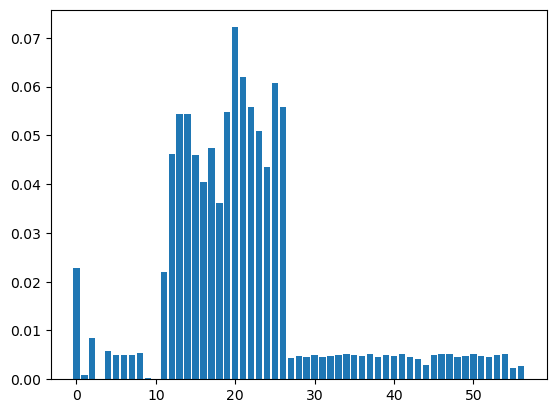

In [280]:
from matplotlib import pyplot
importances = classifier_rf.feature_importances_
# summarize feature importance

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": importances
})

print(imp_df)
# plot feature importance
pyplot.bar([x for x in range(len(importances))], importances)
pyplot.show()

# GridSearchCV


Fitting 5 folds for each of 60 candidates, totalling 300 fits
CV:  GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [27, 39, 50, 63, 75],
                         'min_samples_leaf': [3, 5, 7, 10],
                         'n_estimators': [200, 500, 750]},
             scoring='accuracy', verbose=1) 

Best Estimator:  RandomForestClassifier(max_depth=27, min_samples_leaf=3, n_estimators=200,
                       n_jobs=-1, random_state=42) 

(tn, fp, fn, tp) :  [5379    1  519   38]
Accuracy: 0.9124136769412161
Precision: 0.9743589743589743
F1 Score: 0.12751677852348994
Best Score: 0.9064981949458485
AUC : 0.7112712152863522


              precision    recall  f1-score   support

           0       0.91      1.00      0.95      5380
           1       0.97      0.07      0.13       557

    accuracy                           0.91      5937
   macro avg       0.94      0.53      0.54      59

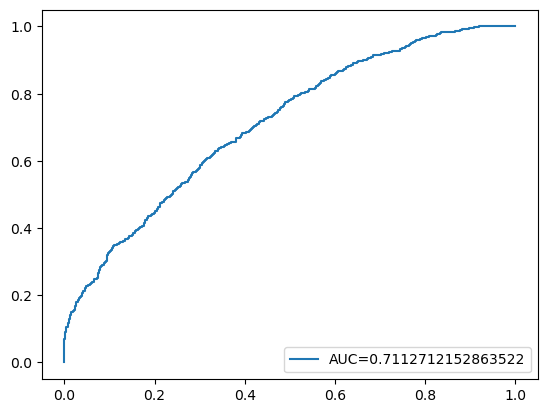

In [281]:
# GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(x_resample, y_resample, train_size=0.7)


rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [27,39,50,63,75],
    'min_samples_leaf': [3,5,7,10],
    'n_estimators': [200,500,750]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train.values.ravel())

y_pred = grid_search.predict(X_test)
print ('CV: ', grid_search, '\n')

rf_best = grid_search.best_estimator_
print ('Best Estimator: ', rf_best, '\n')

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("(tn, fp, fn, tp) : " ,cnf_matrix.ravel())
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Best Score:",grid_search.best_score_)

#define metrics
y_pred_proba = grid_search.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC :",auc)

print ( '\n')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X_train.columns,class_names=['illicit', "No illicit"],filled=True);

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X_train.columns,class_names=['illicit', "No illicit"],filled=True);

                    Varname       Imp
0                    amount  0.021940
1                       fee  0.001051
2                 net_usage  0.007379
3            multi_sign_fee  0.000000
4                   net_fee  0.006121
5      energy_penalty_total  0.004909
6              energy_usage  0.004765
7                energy_fee  0.004419
8        energy_usage_total  0.005719
9                   memoFee  0.000548
10      origin_energy_usage  0.000000
11                o_balance  0.023283
12        o_transactions_in  0.047527
13       o_transactions_out  0.053656
14  o_totalTransactionCount  0.054711
15             o_energyCost  0.046106
16                o_netCost  0.039156
17            o_freeNetUsed  0.048340
18                    o_age  0.037885
19                t_balance  0.058596
20        t_transactions_in  0.075006
21       t_transactions_out  0.065869
22  t_totalTransactionCount  0.058850
23             t_energyCost  0.050079
24                t_netCost  0.041083
25          

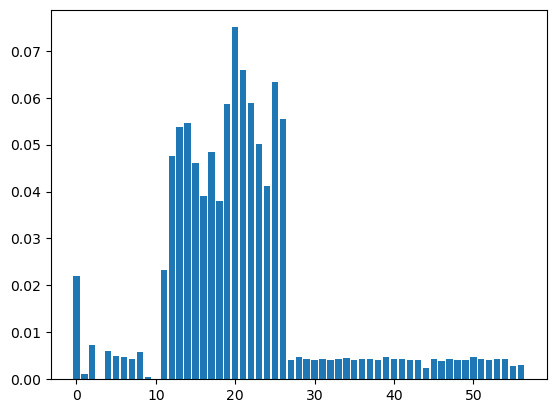

In [282]:


from matplotlib import pyplot
importances = rf_best.feature_importances_
# summarize feature importance

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": importances
})

print(imp_df)
# plot feature importance
pyplot.bar([x for x in range(len(importances))], importances)
pyplot.show()

# RandomizedSearchCV

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Random grid:  RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=60,
                   n_jobs=-1,
                   param_distributions={'max_depth': [27, 39, 50, 63, 75],
                                        'min_samples_leaf': [3, 5, 7, 10],
                                        'n_estimators': [200, 500, 750]},
                   scoring='accuracy', verbose=1) 

Best Parameters:  {'n_estimators': 750, 'min_samples_leaf': 3, 'max_depth': 27}  

(tn, fp, fn, tp) :  [5313    3  590   31]
Accuracy: 0.9001179046656561
Precision: 0.9117647058823529
F1 Score: 0.09465648854961832
Best Score: 0.9110469314079424
AUC : 0.7110418643199092
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      5316
           1       0.91      0.05      0.09       621

    accuracy                           0.90      5937
   macro avg       0.91      0.52      0.52      

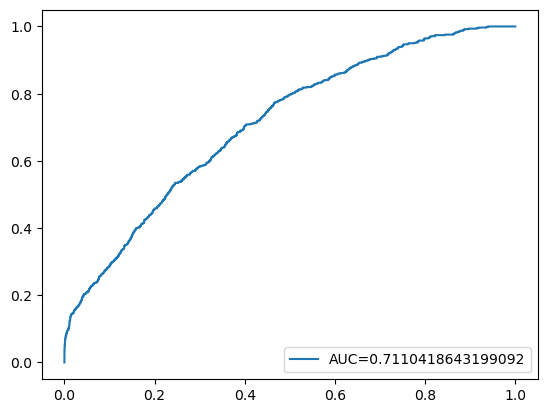

In [283]:
#RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(x_resample, y_resample, train_size=0.7)

rf = RandomForestClassifier (n_jobs=-1)
params = {
    'max_depth': [27,39,50,63,75],
    'min_samples_leaf': [3,5,7,10],
    'n_estimators': [200,500,750]
}

# Instantiate the grid search model
random_search = RandomizedSearchCV(estimator=rf,
                           param_distributions=params,
                           n_iter = 60,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

random_search.fit(X_train, y_train.values.ravel())

print ('Random grid: ', random_search, '\n')
print ('Best Parameters: ', random_search.best_params_, ' \n')

sr_rf_best = grid_search.best_estimator_

y_pred = random_search.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("(tn, fp, fn, tp) : " ,cnf_matrix.ravel())
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))


from sklearn.metrics import classification_report


#define metrics
y_pred_proba = random_search.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

print("Best Score:",random_search.best_score_)
print("AUC :",auc)

print(classification_report(y_test,y_pred))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

                    Varname       Imp
0                    amount  0.021940
1                       fee  0.001051
2                 net_usage  0.007379
3            multi_sign_fee  0.000000
4                   net_fee  0.006121
5      energy_penalty_total  0.004909
6              energy_usage  0.004765
7                energy_fee  0.004419
8        energy_usage_total  0.005719
9                   memoFee  0.000548
10      origin_energy_usage  0.000000
11                o_balance  0.023283
12        o_transactions_in  0.047527
13       o_transactions_out  0.053656
14  o_totalTransactionCount  0.054711
15             o_energyCost  0.046106
16                o_netCost  0.039156
17            o_freeNetUsed  0.048340
18                    o_age  0.037885
19                t_balance  0.058596
20        t_transactions_in  0.075006
21       t_transactions_out  0.065869
22  t_totalTransactionCount  0.058850
23             t_energyCost  0.050079
24                t_netCost  0.041083
25          

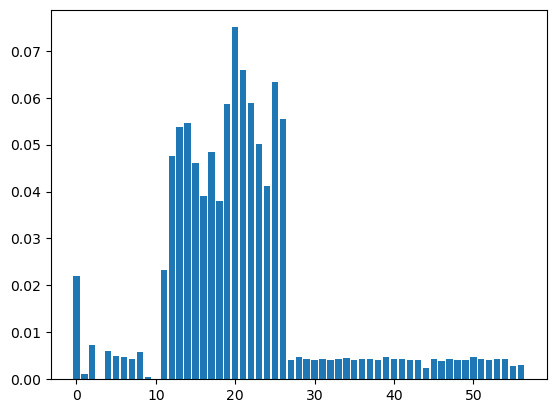

In [284]:




from matplotlib import pyplot
importances = sr_rf_best.feature_importances_
# summarize feature importance

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": importances
})

print(imp_df)
# plot feature importance
pyplot.bar([x for x in range(len(importances))], importances)
pyplot.show()